this is my incredibly foolish algorithm for the faces

In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
# celebs = os.listdir("../faces")
# faces = []
#
# for celeb in celebs:
#     pictures = os.listdir("../faces/{}".format(celeb))
#     for picture in pictures:
#         try:
#             faces.append(np.asarray(Image.open("../faces/{}/{}".format(celeb, picture))))
#         except Exception as e:
#             print(e)
#
# faces

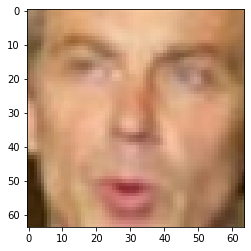

In [5]:
celebs = os.listdir("../cropped_faces")
faces = []

for celeb in celebs:
    faces.append(np.asarray(Image.open("../cropped_faces/{}".format(celeb))))
    # pictures = os.listdir("../cropped_faces/{}".format(celeb))
    # for picture in pictures:
    #     try:
    #         faces.append(np.asarray(Image.open("../cropped_faces/{}/{}".format(celeb, picture))))
    #     except Exception as e:
    #         print(e)

face_array = np.array(faces)
plt.imshow(face_array[np.random.randint(0, len(face_array))], cmap=plt.cm.rainbow)

In [6]:
def get_random_face():
    index = np.random.randint(0, len(face_array))
    return face_array[index], index

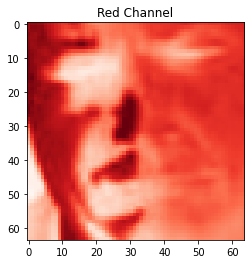

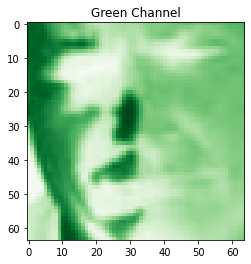

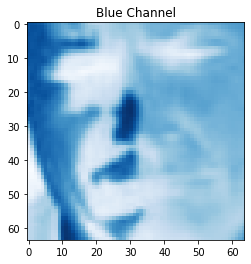

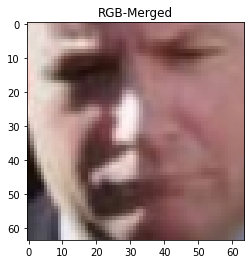

In [7]:
random_face = get_random_face()[0]
random_red, random_green, random_blue = np.dsplit(random_face, 3)
plt.title("Red Channel")
plt.imshow(random_red, cmap=plt.cm.Reds)
plt.show()
plt.title("Green Channel")
plt.imshow(random_green, cmap=plt.cm.Greens)
plt.show()
plt.title("Blue Channel")
plt.imshow(random_blue, cmap=plt.cm.Blues)
plt.show()
plt.title("RGB-Merged")
plt.imshow(np.dstack((random_red, random_green, random_blue)))

In [8]:
def pca(X, n_pc):
    mean = np.mean(X, axis=0)
    centered_data = X - mean # Subtracting the mean from the data
    U, S, V = np.linalg.svd(centered_data) # Taking the SVD from the data
    components = V[:n_pc] # Extracting the principal components
    projected = U[:,:n_pc]*S[:n_pc]

    return projected, components, mean, centered_data

In [9]:
face_array = np.array(faces)

# Splitting up the colored images into their RGB Channels
red, green, blue = np.split(face_array, 3, axis=3)

In [10]:
def eigenfaces(data, faces=50):
    samples, h, w, d = data.shape
    X = data.reshape(samples, h*w) # vectorizing the images
    P, C, M, Y = pca(X, n_pc=faces) # running PCA with the number of principal components specified
    return C.reshape((faces, h, w)), P, C, M, Y #reshaping the principal components to be images

In [11]:
def merge(red, green, blue):
    return np.dstack((red, green, blue)).astype(int)

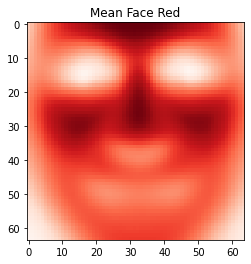

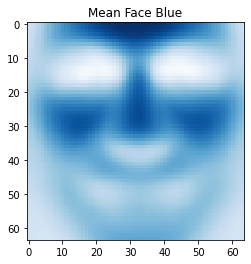

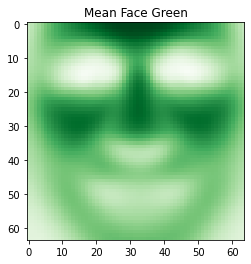

In [12]:
red_mean = np.mean(red, axis=0)
green_mean = np.mean(green, axis=0)
blue_mean = np.mean(blue, axis=0)

plt.title("Mean Face Red")
plt.imshow(red_mean, cmap=plt.cm.Reds)
plt.show()

plt.title("Mean Face Blue")
plt.imshow(blue_mean, cmap=plt.cm.Blues)
plt.show()

plt.title("Mean Face Green")
plt.imshow(green_mean, cmap=plt.cm.Greens)
plt.show()

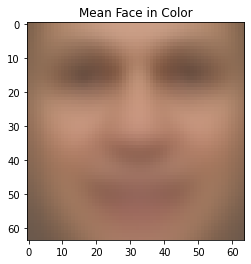

In [13]:
mean_face = merge(red_mean, green_mean, blue_mean)
plt.title("Mean Face in Color")
plt.imshow(mean_face)

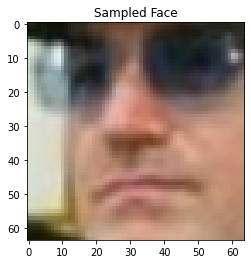

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


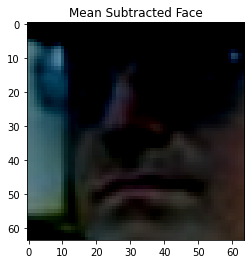

In [14]:
random_face = get_random_face()[0]
random_face2 = get_random_face()[0]
plt.title("Sampled Face")
plt.imshow(random_face)
plt.show()

subtracted = random_face - mean_face
plt.title("Mean Subtracted Face")
plt.imshow(subtracted)
# plt.show()
# plt.imshow(subtracted + random_face2)

In [14]:
num_faces = 50

In [15]:
%time
red_eigenface_array, P_r, C_r, M_r, Y_r = eigenfaces(red, num_faces)

CPU times: user 4 µs, sys: 3 µs, total: 7 µs
Wall time: 12.9 µs


In [16]:
%time
green_eigenface_array, P_g, C_g, M_g, Y_g = eigenfaces(green, num_faces)

CPU times: user 3 µs, sys: 9 µs, total: 12 µs
Wall time: 29.8 µs


In [17]:
%time
blue_eigenface_array, P_b, C_b, M_b, Y_b = eigenfaces(blue, num_faces)

CPU times: user 4 µs, sys: 10 µs, total: 14 µs
Wall time: 16.7 µs


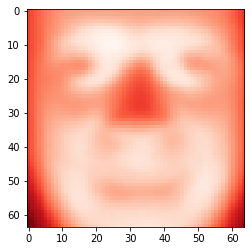

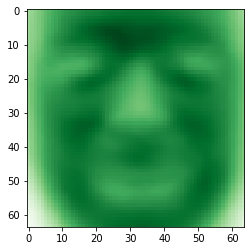

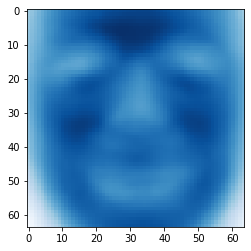

In [18]:
plt.imshow(red_eigenface_array[0], cmap=plt.cm.Reds)
plt.show()
plt.imshow(green_eigenface_array[0], cmap=plt.cm.Greens)
plt.show()
plt.imshow(blue_eigenface_array[0], cmap=plt.cm.Blues)
plt.show()

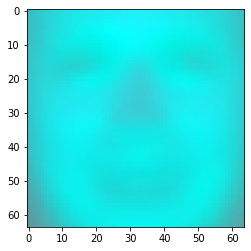

In [19]:
index = 0
red_eigenface = red_eigenface_array[index]
green_eigenface = green_eigenface_array[index]
blue_eigenface = blue_eigenface_array[index]

merged = np.dstack((red_eigenface, green_eigenface, blue_eigenface))
merged -= merged.min()
merged *= 255 / merged.max()
plt.imshow(merged.astype(int))

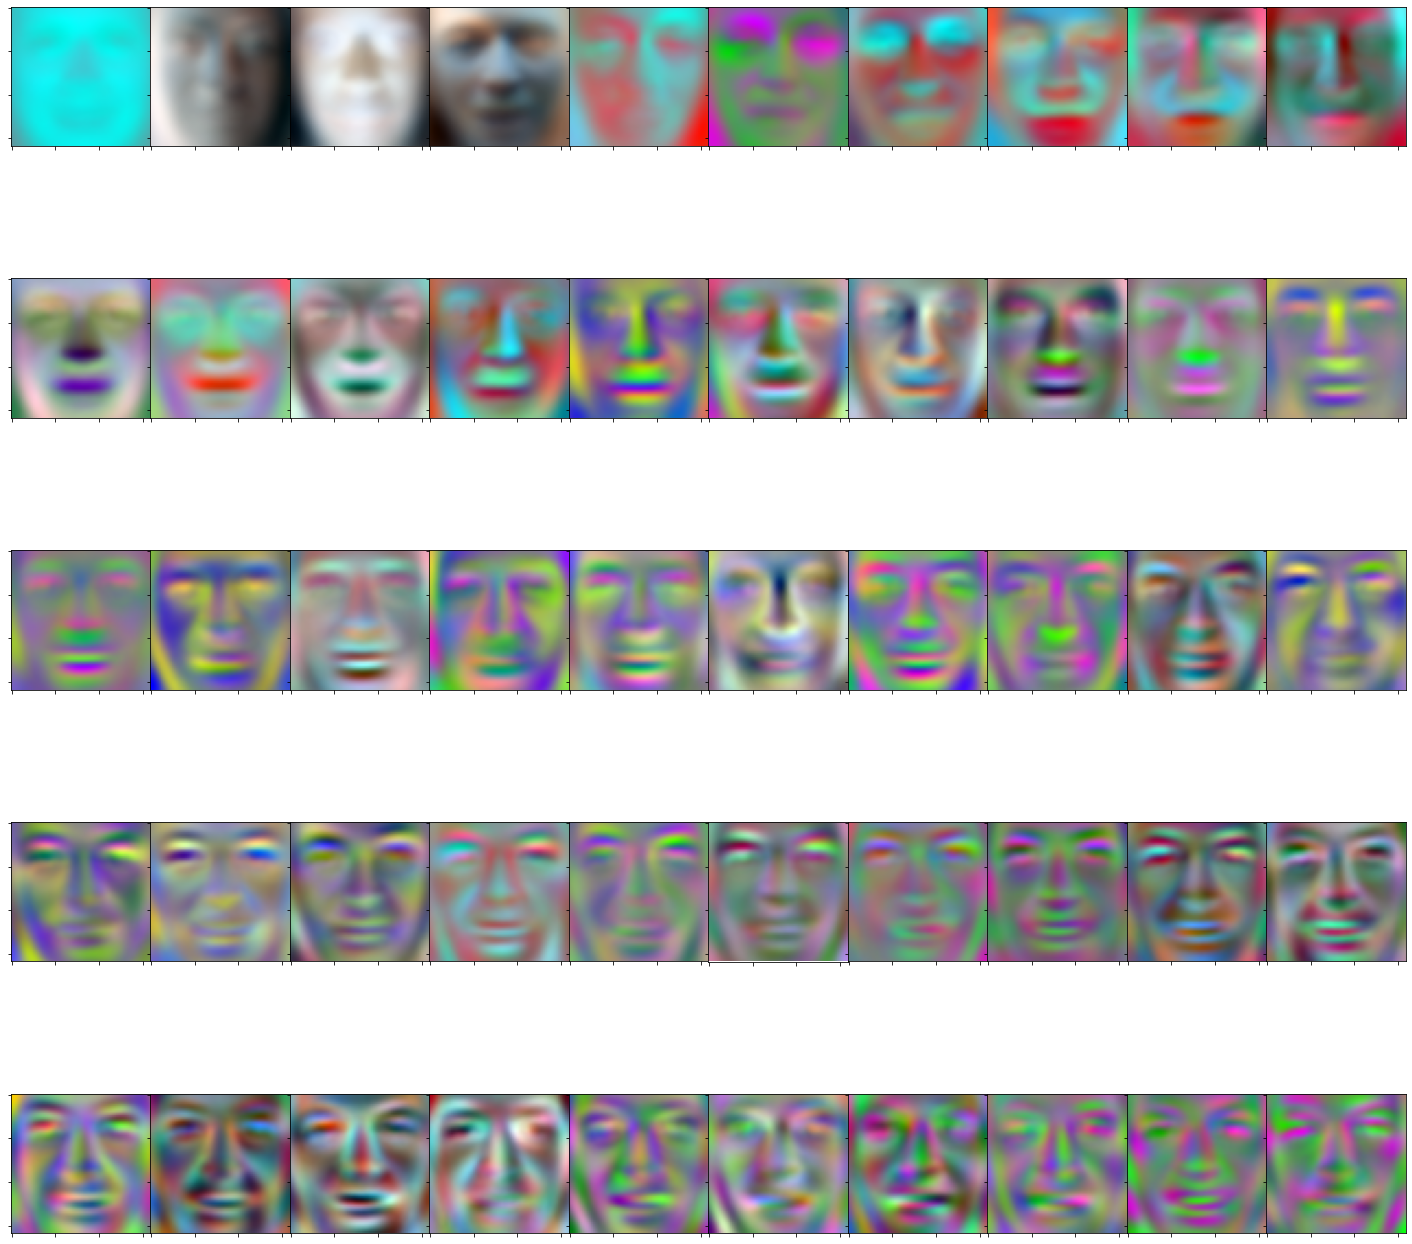

In [20]:
grid, axis_array = plt.subplots(5, 10, figsize=(25, 25))
plt.subplots_adjust(wspace=0, hspace=0)
count = 0
for x in range(5):
    for y in range(10):
        temp = np.dstack((red_eigenface_array[count], green_eigenface_array[count], blue_eigenface_array[count]))
        temp -= temp.min()
        temp *= 255 / temp.max()
        axis_array[x, y].imshow(temp.astype(int))
        axis_array[x, y].set_xticklabels([])
        axis_array[x, y].set_yticklabels([])
        count += 1

In [16]:
def list_to_diagonal(list, size):
    output = np.zeros((len(list), len(list)))
    if size != 0:
        output = np.zeros((size, size))
    for x in range(len(list)):
        output[x, x] = list[x]
    return output

def image_low_rank_approximation(array, rank):
    U_red, S_red, V_red = np.linalg.svd(array[:,:,0])
    U_green, S_green, V_green = np.linalg.svd(array[:,:,1])
    U_blue, S_blue, V_blue = np.linalg.svd(array[:,:,2])
    red_approx = np.zeros((64, 64))
    green_approx = np.zeros((64, 64))
    blue_approx = np.zeros((64, 64))
    for x in range(rank):
        red_approx += S_red[x] * np.outer(U_red.transpose()[x], V_red[x])
        green_approx += S_green[x] * np.outer(U_green.transpose()[x], V_green[x])
        blue_approx += S_blue[x] * np.outer(U_blue.transpose()[x], V_blue[x])
    return np.dstack((red_approx, green_approx, blue_approx))

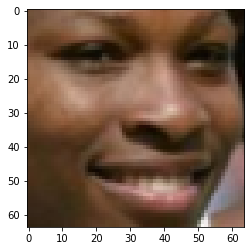

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


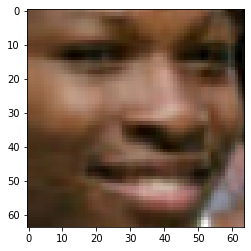

In [43]:
random_face = get_random_face()[0]

plt.imshow(random_face)
plt.show()
plt.imshow(image_low_rank_approximation(random_face, 10).astype(int));

In [23]:
low_rank_faces = np.array([image_low_rank_approximation(face, 5) for face in face_array])

In [24]:
red_lr, green_lr, blue_lr = np.split(low_rank_faces, 3, axis=3)

NameError: name 'low_rank_faces' is not defined

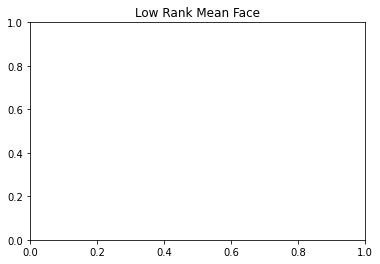

In [37]:
plt.title("Low Rank Mean Face")
plt.imshow(np.average(low_rank_faces, axis=0).astype(int))

In [26]:
num_faces = 50

In [27]:
%time red_eigenface_array_lr, P_r_lr, C_r_lr, M_r_lr, Y_r_lr = eigenfaces(red_lr, num_faces)

CPU times: user 12min 10s, sys: 41.9 s, total: 12min 52s
Wall time: 2min 25s


In [28]:
%time green_eigenface_array_lr, P_g_lr, C_g_lr, M_g_lr, Y_g_lr = eigenfaces(green_lr, num_faces)

CPU times: user 12min 21s, sys: 45.8 s, total: 13min 7s
Wall time: 2min 38s


In [29]:
%time blue_eigenface_array_lr, P_b_lr, C_b_lr, M_b_lr, Y_b_lr = eigenfaces(blue_lr, num_faces)

CPU times: user 14min 34s, sys: 52.9 s, total: 15min 27s
Wall time: 3min 5s


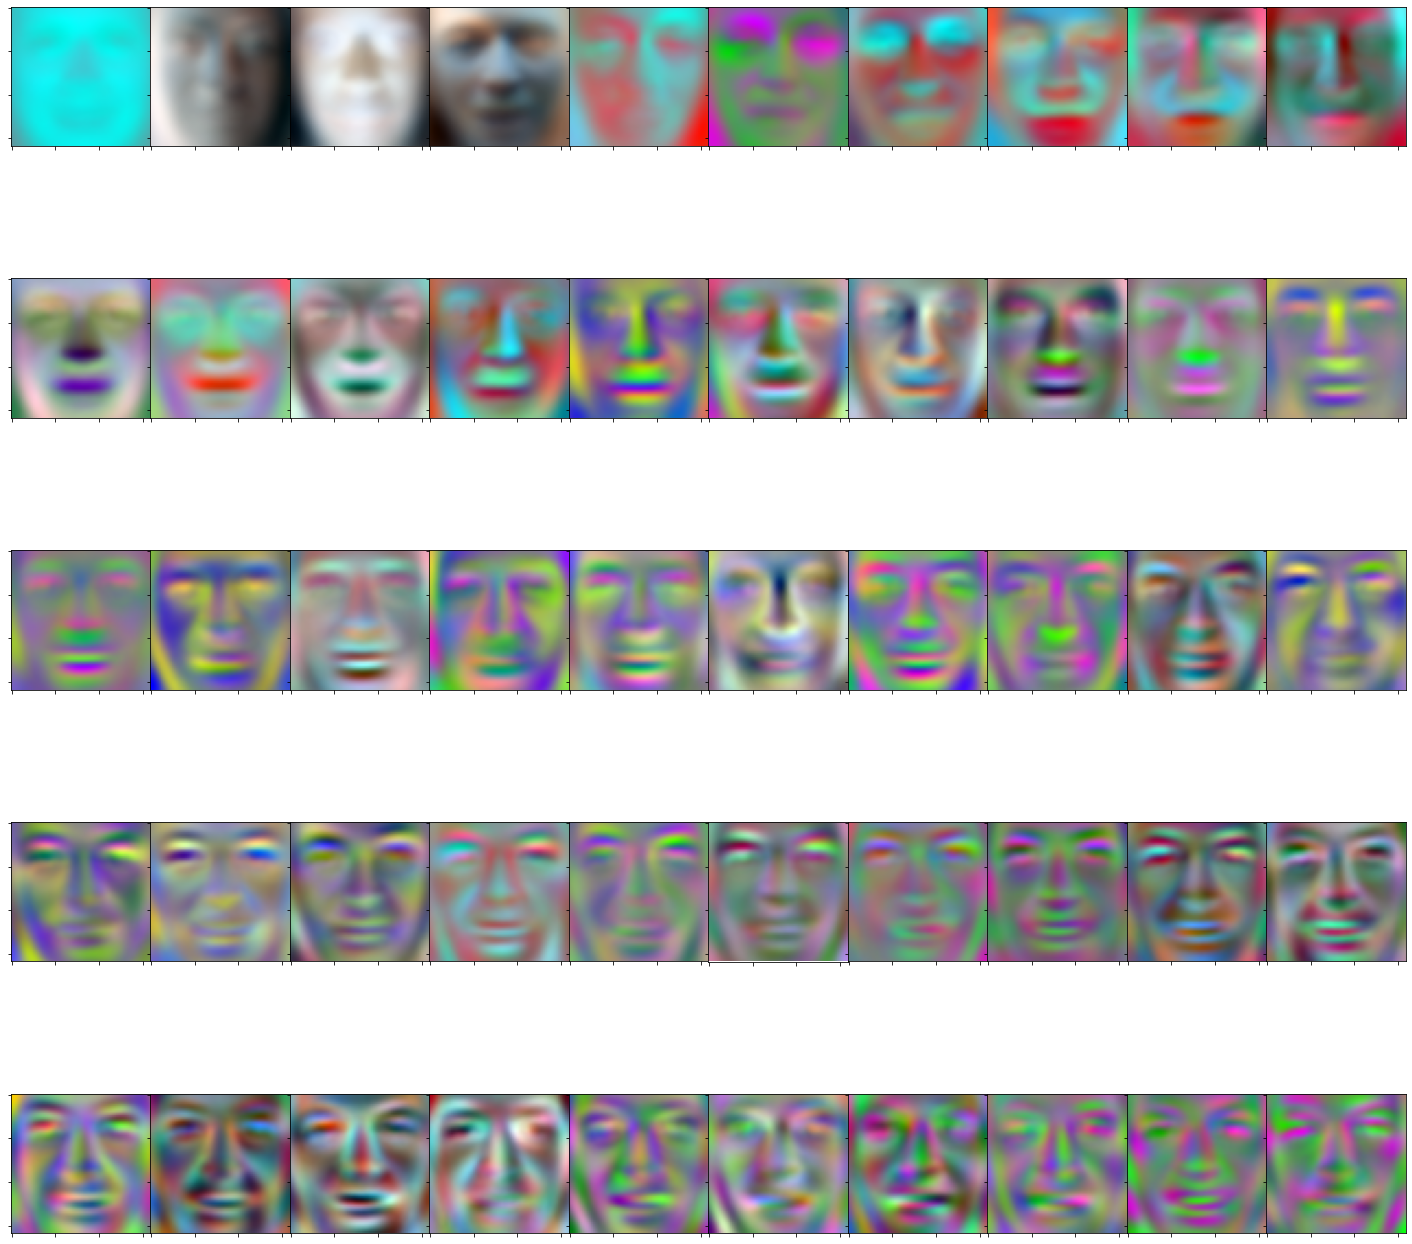

In [30]:
grid, axis_array = plt.subplots(5, 10, figsize=(25, 25))
plt.subplots_adjust(wspace=0, hspace=0)
count = 0
for x in range(5):
    for y in range(10):
        temp = np.dstack((red_eigenface_array[count], green_eigenface_array[count], blue_eigenface_array[count]))
        temp -= temp.min()
        temp *= 255 / temp.max()
        axis_array[x, y].imshow(temp.astype(int))
        axis_array[x, y].set_xticklabels([])
        axis_array[x, y].set_yticklabels([])
        count += 1

In [31]:
def reconstruct(mean_centered, components, mean, index):
    # samples, features = mean_centered.shape
    weights = np.dot(mean_centered, components.T)
    centered_vector = np.dot(weights[index, :], components) # applying weights to each of the components
    recovered = (mean + centered_vector).reshape(64, 64)
    return recovered

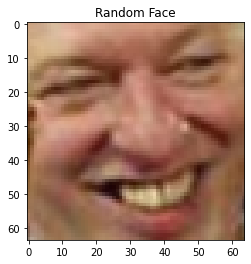

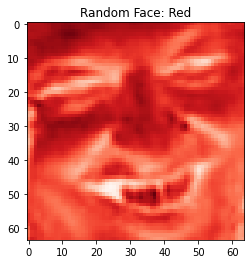

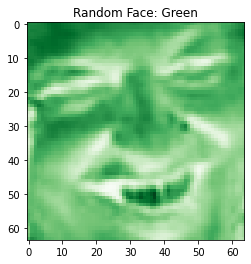

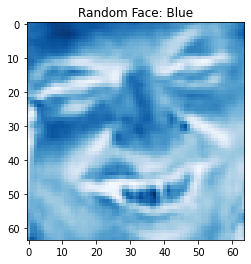

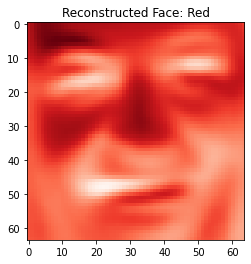

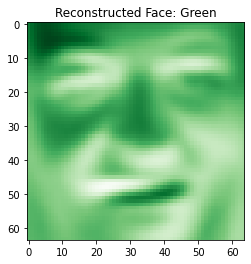

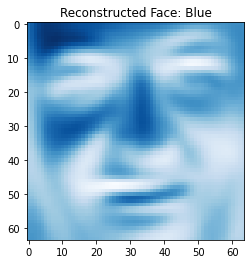

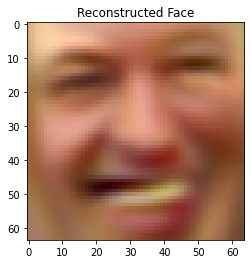

In [32]:
random_face, random_index = get_random_face()

plt.title("Random Face")
plt.imshow(random_face)
plt.show()

random_r, random_g, random_b = np.split(random_face, 3, axis=2)

plt.title("Random Face: Red")
plt.imshow(random_r, cmap="Reds")
plt.show()

plt.title("Random Face: Green")
plt.imshow(random_g, cmap="Greens")
plt.show()

plt.title("Random Face: Blue")
plt.imshow(random_b, cmap="Blues")
plt.show()

random_re_r = reconstruct(Y_r, C_r, M_r, random_index)
random_re_g = reconstruct(Y_g, C_g, M_g, random_index)
random_re_b = reconstruct(Y_b, C_b, M_b, random_index)

plt.title("Reconstructed Face: Red")
plt.imshow(random_re_r, cmap="Reds")
plt.show()

plt.title("Reconstructed Face: Green")
plt.imshow(random_re_g, cmap="Greens")
plt.show()

plt.title("Reconstructed Face: Blue")
plt.imshow(random_re_b, cmap="Blues")
plt.show()

merged = np.dstack((random_re_r, random_re_g, random_re_b))
merged -= merged.min()
merged *= 255 / merged.max()

plt.title("Reconstructed Face")
plt.imshow(merged.astype(int))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


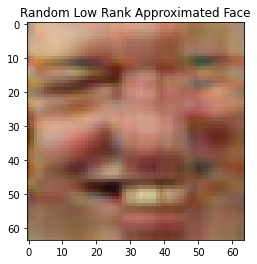

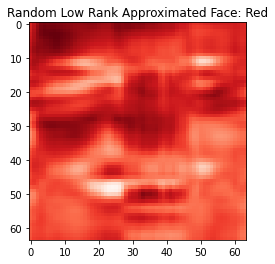

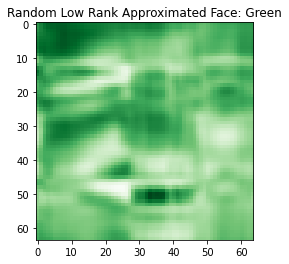

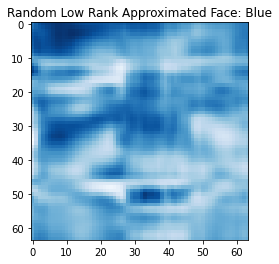

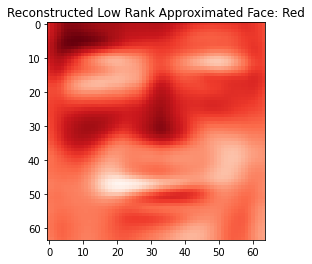

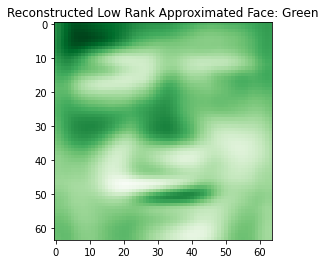

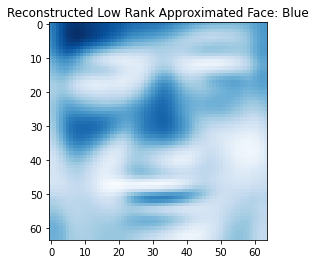

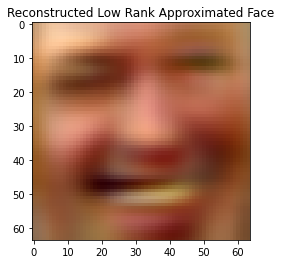

In [33]:
random_face = low_rank_faces[random_index]
plt.title("Random Low Rank Approximated Face")
plt.imshow(random_face.astype(int))
plt.show()

random_r, random_g, random_b = np.split(random_face, 3, axis=2)

plt.title("Random Low Rank Approximated Face: Red")
plt.imshow(random_r, cmap="Reds")
plt.show()

plt.title("Random Low Rank Approximated Face: Green")
plt.imshow(random_g, cmap="Greens")
plt.show()

plt.title("Random Low Rank Approximated Face: Blue")
plt.imshow(random_b, cmap="Blues")
plt.show()

random_re_r_lr = reconstruct(Y_r_lr, C_r_lr, M_r_lr, random_index)
random_re_g_lr = reconstruct(Y_g_lr, C_g_lr, M_g_lr, random_index)
random_re_b_lr = reconstruct(Y_b_lr, C_b_lr, M_b_lr, random_index)

plt.title("Reconstructed Low Rank Approximated Face: Red")
plt.imshow(random_re_r_lr, cmap="Reds")
plt.show()

plt.title("Reconstructed Low Rank Approximated Face: Green")
plt.imshow(random_re_g_lr, cmap="Greens")
plt.show()

plt.title("Reconstructed Low Rank Approximated Face: Blue")
plt.imshow(random_re_b_lr, cmap="Blues")
plt.show()

merged = np.dstack((random_re_r_lr, random_re_g_lr, random_re_b_lr))
merged -= merged.min()
merged *= 255 / merged.max()

plt.title("Reconstructed Low Rank Approximated Face")
plt.imshow(merged.astype(int))
plt.show()